The revised dataset that is being called contains 2403 extracts of Terms of Service and Privacy Policy documents across popular web services that we might be exposed to or even use extensively on a daily basis. These have been flitered by the ToS:DR project as being relevant and important points for consideration and/or awareness to the end user.

These extracts have been segmented into topics, content meaning and rating status (good, bad or neutral)reasons good, bad or neutral.

More than often we neglect to read terms of service and privacy policy documents before we agree on using services because of the tedious length and content. We causally agree on these conditions for convenience sake, understanding the implications of them only when we are subjected to harsh agreements and consequences. Many services get away with unrealistic and unfair conditions with the knowledge that majority of people will choose to ignore terms of service and privacy policy documents as it has almost become innate for us to quickly skip pass through them.

I hope to make these documents online to be easier to read, comprehend and to be fully aware of what one is agreeing to before moving forward to using a service. This will be achieved by:

1. predicting topic beased on content
2. assign a rating (good, bad or neutral) to each extract highlighting the weightage and pontential negative agreement.

In [585]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import requests
from readability import Document
import re
from unicodedata import normalize 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [586]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4,.8, 30))

In [587]:
df = pd.read_csv('../webapp/revised_data')
df.head()

,id,needModeration,services,title,quoteText,topics,case,point
0,5309,0.0,10minutemail,IP addresses of website visitors are not tracked,10MinuteMail com does NOT keep logs or records...,Anonymity and Tracking,IP addresses of website visitors are not tracked,good
1,5310,0.0,10minutemail,This service only uses temporary session cookies,A temporary cookie is used to allow the servic...,Cookies,This service only uses temporary session cookies,good
2,6723,0.0,1password,"Users should revisit the terms periodically, a...","At our discretion, we may make changes to this...",Changes,"Users should revisit the terms periodically, a...",neutral
3,6725,1.0,1password,The service is provided 'as is' and to be used...,Your use of the Service is at your sole risk ...,User information,The service is provided 'as is' and to be used...,bad
4,6726,1.0,1password,The service provider makes no warranty regardi...,"AgileBits, Inc its subsidiaries, affiliates, ...",Guarantee,The service provider makes no warranty regardi...,bad


In [588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403 entries, 0 to 2402
Data columns (total 8 columns):
id                2403 non-null int64
needModeration    2403 non-null float64
services          2403 non-null object
title             2403 non-null object
quoteText         2403 non-null object
topics            2403 non-null object
case              2403 non-null object
point             2403 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 150.3+ KB


In [589]:
df.services.value_counts()

brainly          42
patook           33
roblox           29
discogs          29
bitwarden        26
                 ..
ello              1
searchencrypt     1
skype             1
arc-games         1
livejournal       1
Name: services, Length: 383, dtype: int64

In [590]:
df.topics.value_counts()

Changes                            293
Personal Data                      261
Anonymity and Tracking             260
Governance                         254
Suspension and Censorship          193
Third Parties                      131
User information                   129
Cookies                            116
Ownership                           85
Guarantee                           73
Jurisdiction and governing laws     67
User choice                         66
Right to leave the service          63
Scope of the copyright license      63
Logs                                58
Content                             54
Waiving your right                  46
Business Transfers                  39
Refunds                             37
Transparency                        34
Easy to read                        33
Law enforcement and due process     23
Liability                           14
Law and government requests         11
Name: topics, dtype: int64

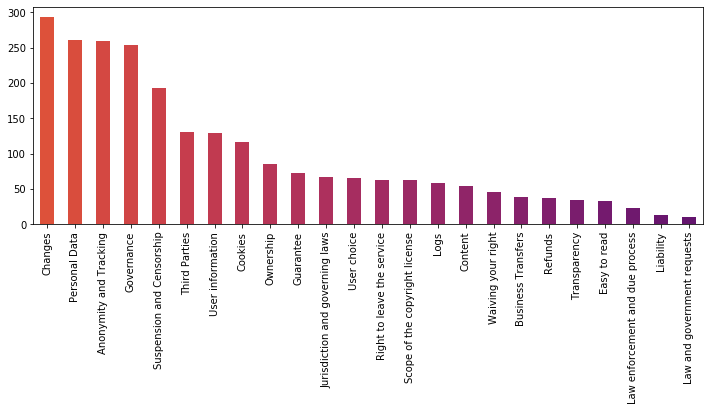

In [591]:
pd.value_counts(df['topics']).plot.bar(stacked=True, color=color, legend=False, figsize=(12,4))

In [592]:
df.case.value_counts()

There is a date of the last update of the terms                                                                        146
This service is only available to users of a certain age                                                                88
The service may use tracking pixels, web beacons, browser fingerprinting, and/or device fingerprinting on users.        82
You agree to defend, indemnify, and hold the service harmless in case of a claim related to your use of the service     65
 Terms may be changed any time at their discretion, without notice to the user                                          62
                                                                                                                      ... 
Prohibits public posting of private messages                                                                             1
You have the right to request lower Charges from Third Party Providers                                                   1
This service thr

In [593]:
df.point.value_counts()

bad        1241
neutral     641
good        521
Name: point, dtype: int64

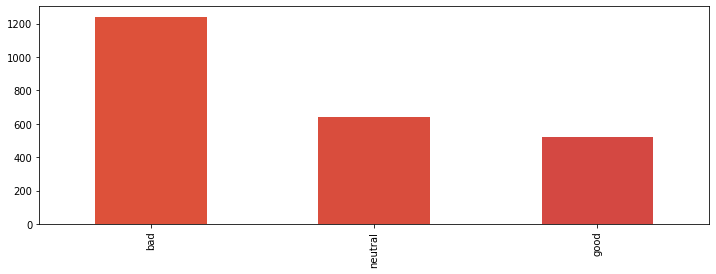

In [594]:
pd.value_counts(df['point']).plot.bar(stacked=True, color=color, legend=False, figsize=(12,4))

### Explore the dataset 

In [595]:
#import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [596]:
cvec = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = 'english') 

In [597]:
cvec.fit(df.quoteText)
len(cvec.get_feature_names())

5274

In [598]:
print(cvec.get_feature_names())

['000', '00px', '01', '02', '03', '0303', '04', '05', '06', '07', '08', '09', '10', '100', '10013', '101', '10115', '10minutemail', '10th', '11', '1113', '11th', '12', '120', '123', '13', '14', '15', '16', '17', '179', '18', '18th', '19', '1978', '1l7', '20', '2005last', '2010', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '20th', '21', '22', '23', '23rd', '24', '24th', '25', '250', '256', '256bit', '26', '26th', '27', '2705', '27th', '28', '29', '2fa', '2nd', '30', '31', '32', '333', '34', '36209614', '3g', '3rd', '402', '416', '43', '45', '48', '4833', '50', '500px', '519522125107875', '60', '65', '66', '66123', '69710', '6nb', '6pz', '75', '76', '77', '78', '887', '90', '94107', '95', '972', '99', '9th', '__cfduid', '__ga', '__gid', '__tawkuuid', '__utma', '__utmb', '_hjincludedinsample', 'aaa', 'aan', 'aanbieding', 'aankoopbedrag', 'aanleg', 'abc', 'abide', 'abiding', 'abilities', 'ability', 'able', 'abonnementsovereenkomst', 'abortion', 'aboutads', 'aboutcookies

In [599]:
cvec_mat = cvec.transform(df.quoteText)
words = cvec.get_feature_names()
a = cvec_mat.sum(axis=0)
word_df = pd.DataFrame(a,columns=words).transpose().sort_values(by=0,ascending=False)
word_df.rename(columns={0: 'frequency'}, inplace=True)

In [600]:
word_df.head(10)

,frequency
information,1214
use,1155
services,974
service,679
content,622
data,601
account,501
personal,472
terms,458
time,417


In [601]:
# created a tokens column for future use
tokenizer = RegexpTokenizer(r'\w+')
df['tokenized'] = df['quoteText'].apply(tokenizer.tokenize)

In [602]:
def text_to_words(titletext):
    
    # 1. keep only alphabets.
    letters_only = re.sub("[^a-zA-Z]", " ", titletext)
    
    # 2. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 5. lemmatizer the words.
    lemmatizer = WordNetLemmatizer()
    tokens_lem = [lemmatizer.lemmatize(i) for i in words]
    
    # 6. Join the words back into one string separated by space, and return the result.
    return(' '.join(tokens_lem))

In [603]:
#call the function to clean df['quoteText']
lemmatized=[]

for text in df['quoteText']:
     # Convert text to words, then append to clean_text.
    lemmatized.append(text_to_words(text))

In [604]:
lemmatized

['minutemail com doe not keep log or record of your personal data including but not limited to your ip address your incoming e mail and your outgoing e mail',
 'a temporary cookie is used to allow the service to deliver the e mail to the right person but will expire when you close your browser',
 'at our discretion we may make change to this policy and note the date of the last revision you should check here frequently if you need to know of update to our privacy policy we maintain the right to send you annoying email informing you of substantive change',
 'your use of the service is at your sole risk the service is provided on an a is and a available basis',
 'agilebits inc it subsidiary affiliate and it licensors do not warrant that a the service will function uninterrupted secure or available at any particular time or location',
 'any error or defect will be corrected',
 'the change log section below is not a part of these term nor is the term of service archive or any content linke

In [605]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

bigger_list=[]

for i in df['quoteText']:
    li = list(i.split(" "))
    bigger_list.append(li)
    
#structure of data to be taken by the model.word2vec
print(bigger_list)

#custom data is fed to machine for further processing
model = Word2Vec(bigger_list, min_count=1,size=300,workers=4)

[['10MinuteMail', 'com', 'does', 'NOT', 'keep', 'logs', 'or', 'records', 'of', 'your', 'personal', 'data', 'including,', 'but', 'not', 'limited', 'to,', 'your', 'IP', 'address,', 'your', 'incoming', 'e', 'mail,', 'and', 'your', 'outgoing', 'e', 'mail', ''], ['A', 'temporary', 'cookie', 'is', 'used', 'to', 'allow', 'the', 'service', 'to', 'deliver', 'the', 'e', 'mail', 'to', 'the', 'right', 'person,', 'but', 'will', 'expire', 'when', 'you', 'close', 'your', 'browser', ''], ['At', 'our', 'discretion,', 'we', 'may', 'make', 'changes', 'to', 'this', 'Policy', 'and', 'note', 'the', 'date', 'of', 'the', 'last', 'revision', '', 'You', 'should', 'check', 'here', 'frequently', 'if', 'you', 'need', 'to', 'know', 'of', 'updates', 'to', 'our', 'Privacy', 'Policy', '', 'We', 'maintain', 'the', 'right', 'to', 'send', 'you', 'annoying', 'email', 'informing', 'you', 'of', 'substantive', 'changes', ''], ['Your', 'use', 'of', 'the', 'Service', 'is', 'at', 'your', 'sole', 'risk', '', 'The', 'Service', 'i

In [606]:
print(model)

Word2Vec(vocab=9494, size=300, alpha=0.025)


In [607]:
similar_words = model.most_similar('personal')
print(similar_words)

[('combine', 0.9979146122932434), ('information', 0.9971004724502563), ('collect', 0.9966509938240051), ('about', 0.9939871430397034), ('share', 0.9933074712753296), ('associate', 0.9922001361846924), ('provide', 0.9877241253852844), ('use', 0.9869270920753479), ('visits', 0.9856014251708984), ('we', 0.983905017375946)]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [608]:
dissimlar_words = model.doesnt_match('not keep log or record of your personal data'.split())
print(dissimlar_words)

personal


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [609]:
similarity_two_words = model.similarity('data','information')
print("Please provide the similarity between these two words:")
print(similarity_two_words)

Please provide the similarity between these two words:
0.99017286


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


In [610]:
similar = model.similar_by_word('kind')
print(similar)

[('regard', 0.9996450543403625), ('conflict', 0.9995614290237427), ('current', 0.9995338320732117), ('cause', 0.9994457364082336), ('change,', 0.9994370937347412), ('its', 0.9994224309921265), ('expense,', 0.9994102120399475), ('applicable', 0.9993829727172852), ('dispute', 0.9993723034858704), ('expense', 0.9993386268615723)]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


In [611]:
df['lemmatized'] = lemmatized

In [612]:
df.head()

,id,needModeration,services,title,quoteText,topics,case,point,tokenized,lemmatized
0,5309,0.0,10minutemail,IP addresses of website visitors are not tracked,10MinuteMail com does NOT keep logs or records...,Anonymity and Tracking,IP addresses of website visitors are not tracked,good,"[10MinuteMail, com, does, NOT, keep, logs, or,...",minutemail com doe not keep log or record of y...
1,5310,0.0,10minutemail,This service only uses temporary session cookies,A temporary cookie is used to allow the servic...,Cookies,This service only uses temporary session cookies,good,"[A, temporary, cookie, is, used, to, allow, th...",a temporary cookie is used to allow the servic...
2,6723,0.0,1password,"Users should revisit the terms periodically, a...","At our discretion, we may make changes to this...",Changes,"Users should revisit the terms periodically, a...",neutral,"[At, our, discretion, we, may, make, changes, ...",at our discretion we may make change to this p...
3,6725,1.0,1password,The service is provided 'as is' and to be used...,Your use of the Service is at your sole risk ...,User information,The service is provided 'as is' and to be used...,bad,"[Your, use, of, the, Service, is, at, your, so...",your use of the service is at your sole risk t...
4,6726,1.0,1password,The service provider makes no warranty regardi...,"AgileBits, Inc its subsidiaries, affiliates, ...",Guarantee,The service provider makes no warranty regardi...,bad,"[AgileBits, Inc, its, subsidiaries, affiliates...",agilebits inc it subsidiary affiliate and it l...


In [613]:
df[['quoteText','lemmatized']].head(10)

,quoteText,lemmatized
0,10MinuteMail com does NOT keep logs or records...,minutemail com doe not keep log or record of y...
1,A temporary cookie is used to allow the servic...,a temporary cookie is used to allow the servic...
2,"At our discretion, we may make changes to this...",at our discretion we may make change to this p...
3,Your use of the Service is at your sole risk ...,your use of the service is at your sole risk t...
4,"AgileBits, Inc its subsidiaries, affiliates, ...",agilebits inc it subsidiary affiliate and it l...
5,any errors or defects will be corrected,any error or defect will be corrected
6,The Change Log section below is not a part of ...,the change log section below is not a part of ...
7,We DON'T share your data,we don t share your data
8,"Last updated July 4, 2019",last updated july
9,We WILL NOT disclose your information even if ...,we will not disclose your information even if ...


In [614]:
df.to_csv('../webapp/revised_revised_data', index = None, header=True)

In [615]:
df_topics = df[['quoteText','topics']]
df_topics

,quoteText,topics
0,10MinuteMail com does NOT keep logs or records...,Anonymity and Tracking
1,A temporary cookie is used to allow the servic...,Cookies
2,"At our discretion, we may make changes to this...",Changes
3,Your use of the Service is at your sole risk ...,User information
4,"AgileBits, Inc its subsidiaries, affiliates, ...",Guarantee
...,...,...
2398,"Do Not Track Requests Currently, our systems...",Anonymity and Tracking
2399,Custom Audiences and Matching Unless you ha...,User choice
2400,AGE RESTRICTIONS Although our website is a gen...,Governance
2401,We do not respond to do not track signals set ...,Anonymity and Tracking


In [616]:
df_topics.to_csv('../webapp/revised_topics_data', index = None, header=True)

In [617]:
cvec_lem = CountVectorizer(stop_words = 'english')
cvec_lem.fit(df.lemmatized)
len(cvec_lem.get_feature_names())

4618

In [618]:
cvec_lem_mat = cvec_lem.transform(df.lemmatized)

In [619]:
lem_words = cvec_lem.get_feature_names()
a = cvec_lem_mat.sum(axis=0)
lem_word_df = pd.DataFrame(a,columns=lem_words).transpose().sort_values(by=0,ascending=False)
lem_word_df.rename(columns={0: 'frequency'}, inplace=True)

In [620]:
lem_word_df.head(20)

,frequency
service,1653
information,1217
use,1156
content,638
data,601
account,545
party,540
user,529
right,493
personal,472


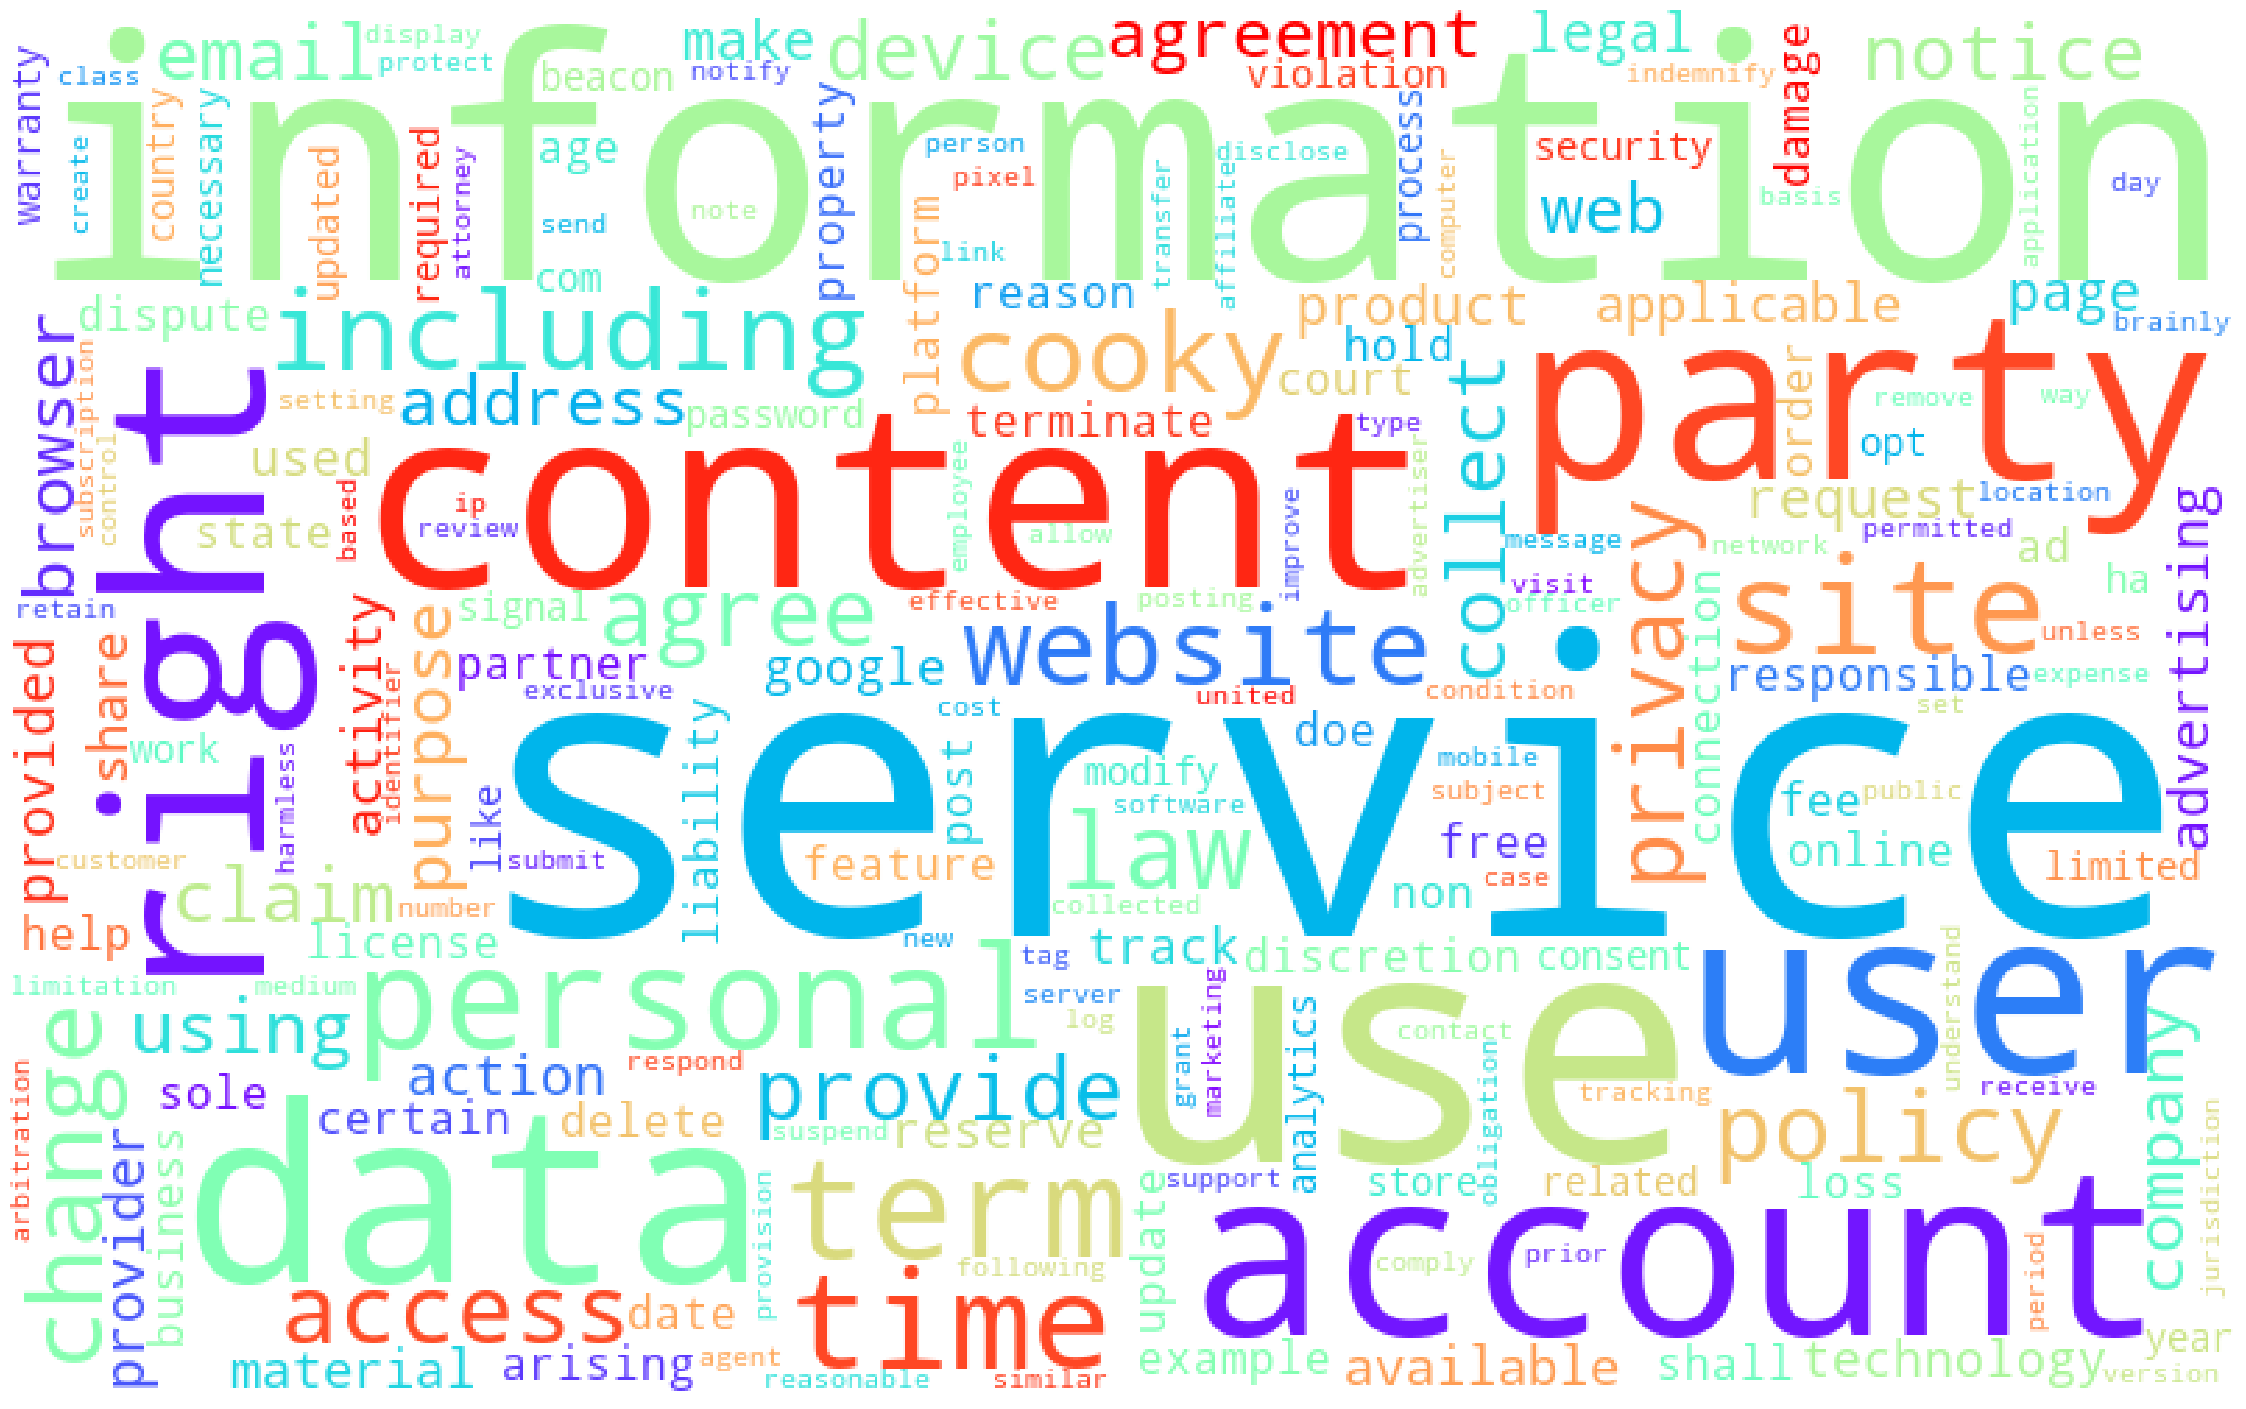

In [621]:
from wordcloud import WordCloud

wc = WordCloud(mode='RGBA',background_color='white',colormap='rainbow',random_state=2, width = 800, height = 500)

wc_gen = wc.generate_from_frequencies(dict(lem_word_df['frequency']))

plt.figure(figsize=(40,30))
plt.imshow(wc_gen)
plt.axis("off");

In addition to visualising keywords, Wordcloud also gives a visual mapping of the most repeated words - allowed to identitfy unneccessary html tag words such as < strong >, li etc which was drawn back to data cleaning component to be removed once again

Though WordCloud are useful in identitying keywords, it fares poorly in obtaining significance as there is a large difference in meaning overlaps of words in various topics even with common stop words removed.

This indicates that the observations are largely similar, which means a model search should seek to identify less common words as predictors. TFIDF would be a good approach.

In [622]:
from sklearn.feature_extraction import text 

stop_words = text.ENGLISH_STOP_WORDS.union(['service', 'information', 'use', 'content', 'data',
'account', 'party', 'user', 'right','personal','term',
'site','time', 'including', 'website', 'cooky','law',
'strong', 'change', 'access','po', 'cy', 'ty', 'strong'])

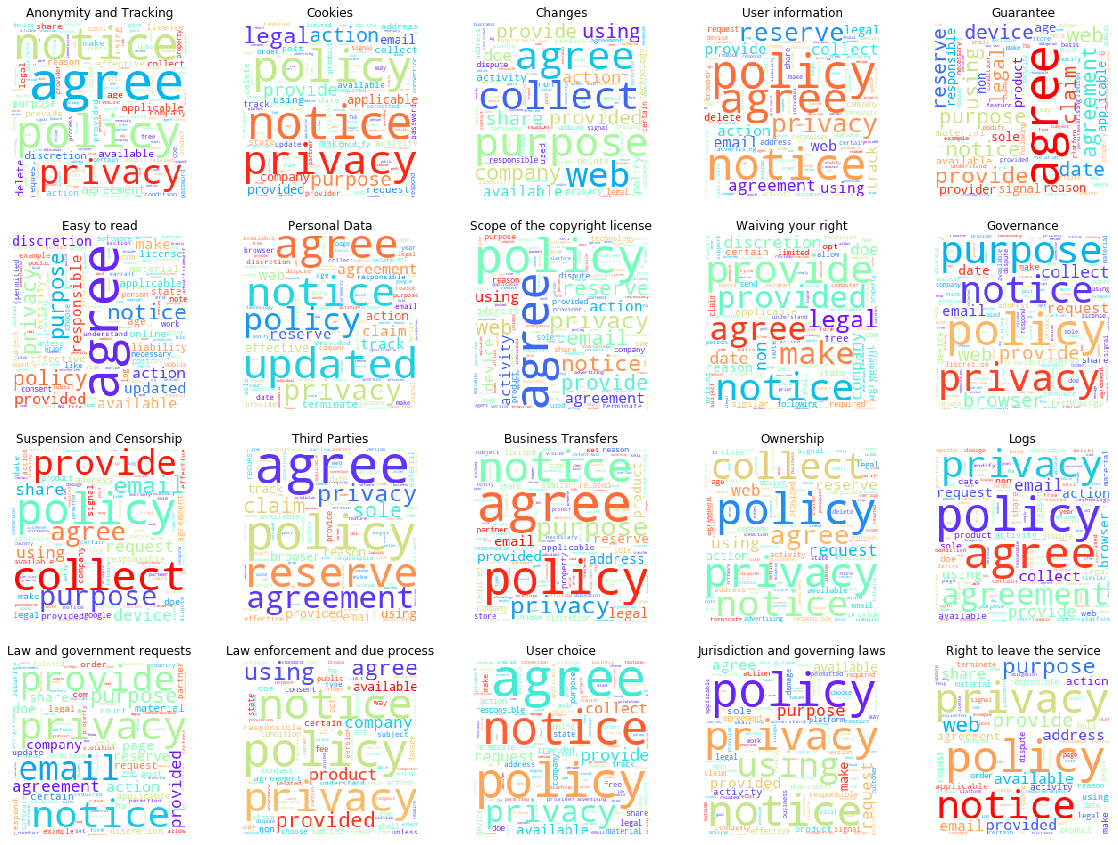

In [623]:
# word cloud for each topic (outcome variable)
topics = list(df.topics.unique())
wc = WordCloud(mode='RGBA',background_color='white',colormap='rainbow',random_state=2, width=200, height=200)
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(20,15))
for ax, topic in zip(axs.flat, topics):
    subset = df[df.topics == topic]
    cvec_top = TfidfVectorizer(stop_words=stop_words)
    cvec_top.fit(subset.lemmatized)
    cvec_top_mat = cvec_top.transform(df.lemmatized)
    topic_words = cvec_top.get_feature_names()
    a = cvec_top_mat.sum(axis=0)
    top_word_df = pd.DataFrame(a,columns=topic_words).transpose().sort_values(by=0,ascending=False)
    wc_top = wc.generate_from_frequencies(dict(top_word_df[0]))
    ax.imshow(wc_top)
    ax.set_title(str(topic))
    ax.axis("off")

## Preprocessing & Modeling

In [566]:
#assign target and result to y and X then carry out train test split
X = lemmatized
y = df['topics']

In [567]:
X

['minutemail com doe not keep log or record of your personal data including but not limited to your ip address your incoming e mail and your outgoing e mail',
 'a temporary cookie is used to allow the service to deliver the e mail to the right person but will expire when you close your browser',
 'at our discretion we may make change to this policy and note the date of the last revision you should check here frequently if you need to know of update to our privacy policy we maintain the right to send you annoying email informing you of substantive change',
 'your use of the service is at your sole risk the service is provided on an a is and a available basis',
 'agilebits inc it subsidiary affiliate and it licensors do not warrant that a the service will function uninterrupted secure or available at any particular time or location',
 'any error or defect will be corrected',
 'the change log section below is not a part of these term nor is the term of service archive or any content linke

In [568]:
# Import train_test_split.
from sklearn.model_selection import train_test_split

# Create train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [569]:
y.value_counts(normalize=True)

Changes                            0.121931
Personal Data                      0.108614
Anonymity and Tracking             0.108198
Governance                         0.105701
Suspension and Censorship          0.080316
Third Parties                      0.054515
User information                   0.053683
Cookies                            0.048273
Ownership                          0.035372
Guarantee                          0.030379
Jurisdiction and governing laws    0.027882
User choice                        0.027466
Right to leave the service         0.026217
Scope of the copyright license     0.026217
Logs                               0.024136
Content                            0.022472
Waiving your right                 0.019143
Business Transfers                 0.016230
Refunds                            0.015397
Transparency                       0.014149
Easy to read                       0.013733
Law enforcement and due process    0.009571
Liability                       

Let's try to use CountVectorizer first with a baseline model of Logistic Regression and then compare with TfidfVectorizer

#### Model I (LogisticRegression + CountVectorizer)

In [570]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(X_train)
X_train_cvec = cvec.transform(X_train)
X_test_cvec = cvec.transform(X_test)

In [571]:
lr = LogisticRegression()
lr.fit(X_train_cvec, y_train)
lr.score(X_train_cvec, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9877913429522752

Overfitting is common in NLP as the model is fitting random idiosyncrasies in the training data rather than model the true underlying trends. Thus, looking at the test score will be of bertter significance. 

In [572]:
lr.score(X_test_cvec, y_test)

0.6988352745424293

In [573]:
# obtain predicted topics
y_train_preds = lr.predict(X_train_cvec)
y_test_preds = lr.predict(X_test_cvec)

In [574]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def scores(y_test, y_predicted):  
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = scores(y_test, y_test_preds)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.699, precision = 0.701, recall = 0.699, f1 = 0.691


In [575]:
baseline = y_test.value_counts().max() / len(y_test)
print(baseline)

0.1264559068219634


In [99]:
from sklearn.metrics import confusion_matrix, classification_report

def docm(y_true, y_pred, labels=None):
    cm = confusion_matrix(y_true, y_pred)
    if labels is not None:
        cols = ['p_'+c for c in labels]
        df = pd.DataFrame(cm, index=labels, columns=cols)
    else:
        cols = ['p_'+str(i) for i in range(len(cm))]
        df = pd.DataFrame(cm, columns=cols)
    return df

In [100]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)

    plt.imshow(cm, interpolation='nearest', cmap='YlGnBu')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)


    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.tight_layout()
    

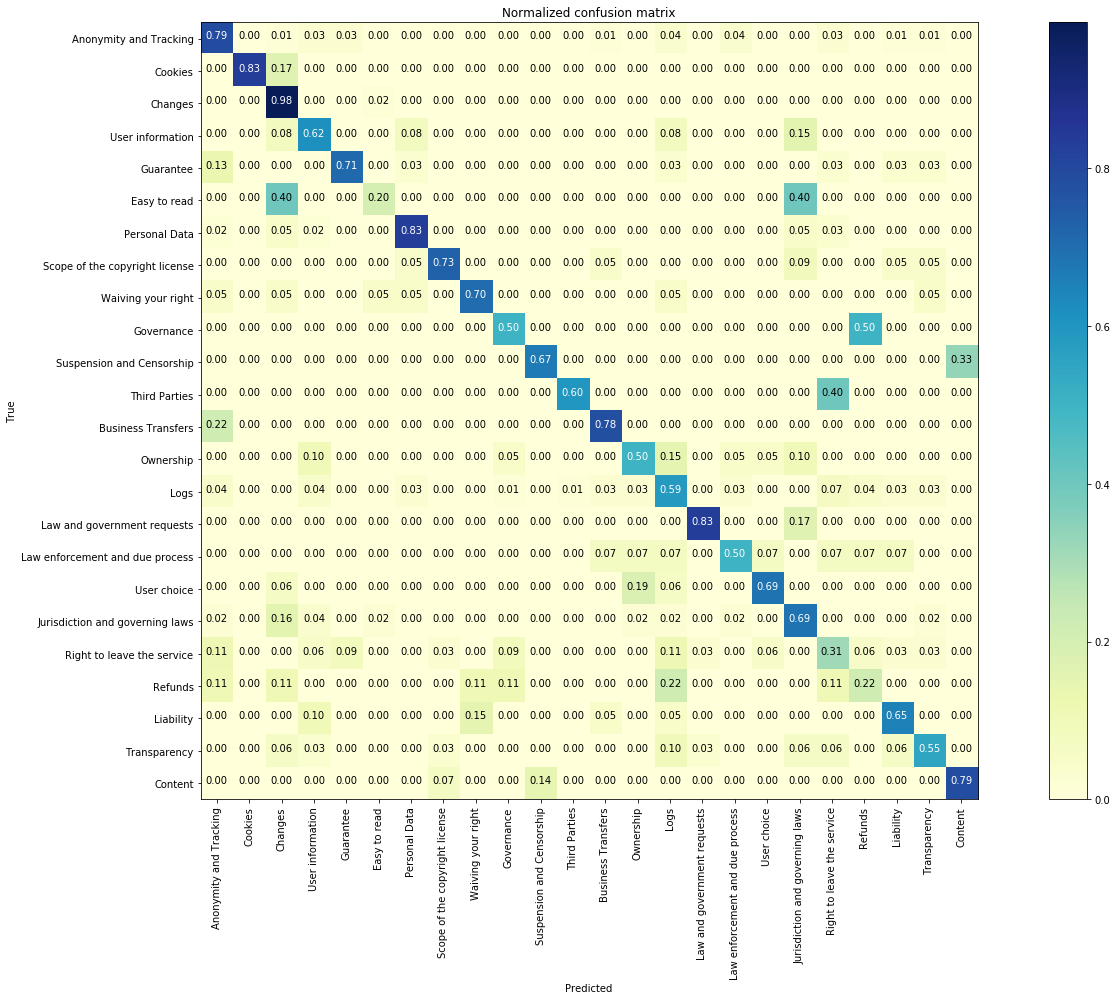

In [101]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_preds)

np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(20,14))
plot_confusion_matrix(cnf_matrix, classes=topics, normalize=True,
                      title='Normalized confusion matrix')
plt.tight_layout()
plt.show()


Model I of LogisticRegression with CountVectorizer makes good overall predictions with certain misses eg. (Refunds, Right to Leave Service and Ownership and Easy to Read) as the Predicted-True score is below 0.5

#### Model II (LogisticRegression + TfidfVectorizer)

In [102]:
tvec = TfidfVectorizer(stop_words='english')
tvec.fit(X_train)
X_train_tvec = tvec.transform(X_train)
X_test_tvec = tvec.transform(X_test)

In [103]:
lr_tvec = LogisticRegression()
lr_tvec.fit(X_train_tvec, y_train)
lr_tvec.score(X_train_tvec, y_train)

0.8462819089900111

Less overfitting as compared to Model 1 with CountVectorizer.

In [104]:
lr.score(X_test_tvec, y_test)

0.5158069883527454

In [105]:
# obtain predicted topics
y_train_preds_tvec = lr_tvec.predict(X_train_tvec)
y_preds_tvec = lr_tvec.predict(X_test_tvec)

In [106]:
accuracy, precision, recall, f1 = scores(y_test, y_preds_tvec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.704, precision = 0.707, recall = 0.704, f1 = 0.679


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model II with TfidfVectorizer has a higher percision score of 0.707 compared to Model I with CountVectorizer of 0.699 indicating Model II is better at determining rate of false positives. Therefore, we are go ahead with TfidfVectorizer.

### GridSearch 

In [107]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [108]:
lr_gs_tvec = LogisticRegression()
model_params = {'penalty':['l2'],
             'C':np.logspace(-2,2,5),
             'class_weight':['balanced',None],
             'solver':['newton-cg','lbfgs'],
             'multi_class':['multinomial'],
             'max_iter':[1000]
            }
gs_tvec = GridSearchCV(lr_gs_tvec, model_params, cv=5, n_jobs=-1)    
gs_tvec.fit(X_train_tvec, y_train)
best_score_tvec = gs_tvec.best_score_
print(best_score_tvec)
best_params_tvec = gs_tvec.best_params_
best_params_tvec

0.7252923976608188


{'C': 10.0,
 'class_weight': 'balanced',
 'max_iter': 1000,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'solver': 'newton-cg'}

The best score implies that out of 100 instances, the model correctly predicts the topic 72.3 times.

In [109]:
score_train_tvec = gs_tvec.score(X_train_tvec,y_train)
score_train_tvec

0.9805771365149833

In [110]:
score_test_tvec = gs_tvec.score(X_test_tvec,y_test)
score_test_tvec

0.7271214642262895

In [111]:
# using best_params_tvec

classifier = LogisticRegression(C=10.0, class_weight='balanced', solver='newton-cg', multi_class='multinomial',
                          random_state=42)
classifier.fit(X_train_tvec, y_train)
y_preds_tvec = classifier.predict(X_test_tvec)

In [112]:
accuracy, precision, recall, f1 = scores(y_test, y_preds_tvec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.727, precision = 0.742, recall = 0.727, f1 = 0.731


The precision score has increased to 0.742 from 0.707. GridSearch didn't cause a considerable increase despite better hyperparameters. Its performance is highly variable by topic as seen in the confusion matrix below, which likely is an indicator of the quality and differentiation of the topics.

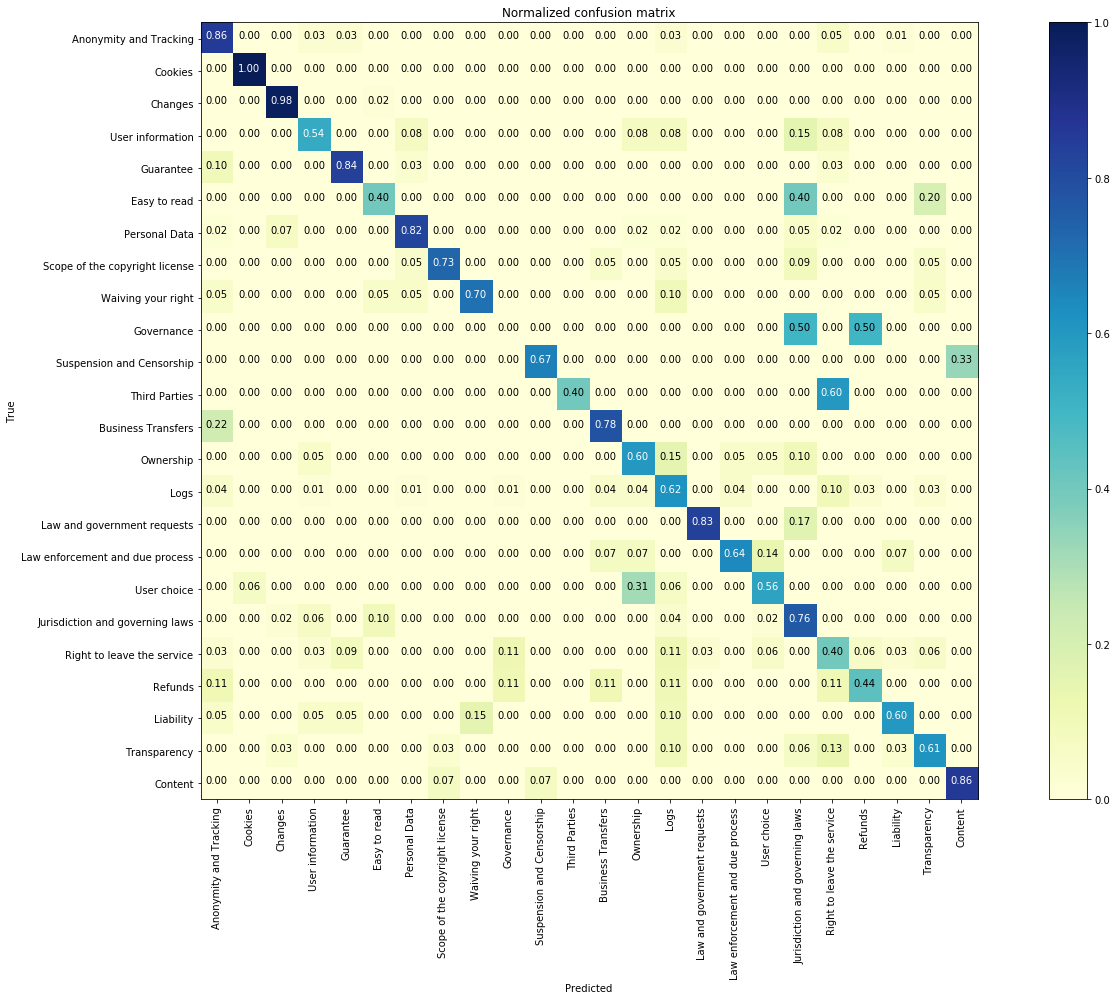

In [113]:
# Compute confusion matrix
cnf_matrix_2 = confusion_matrix(y_test, y_preds_tvec)

np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(20,14))
plot_confusion_matrix(cnf_matrix_2, classes=topics, normalize=True,
                      title='Normalized confusion matrix')
plt.tight_layout()
plt.show()

### Rating Classification

In [582]:
df

,id,needModeration,services,title,quoteText,topics,case,tokenized,lemmatized,point_bad,point_non-bad
0,5309,0.0,10minutemail,IP addresses of website visitors are not tracked,10MinuteMail com does NOT keep logs or records...,Anonymity and Tracking,IP addresses of website visitors are not tracked,"[10MinuteMail, com, does, NOT, keep, logs, or,...",minutemail com doe not keep log or record of y...,0,1
1,5310,0.0,10minutemail,This service only uses temporary session cookies,A temporary cookie is used to allow the servic...,Cookies,This service only uses temporary session cookies,"[A, temporary, cookie, is, used, to, allow, th...",a temporary cookie is used to allow the servic...,0,1
2,6723,0.0,1password,"Users should revisit the terms periodically, a...","At our discretion, we may make changes to this...",Changes,"Users should revisit the terms periodically, a...","[At, our, discretion, we, may, make, changes, ...",at our discretion we may make change to this p...,0,1
3,6725,1.0,1password,The service is provided 'as is' and to be used...,Your use of the Service is at your sole risk ...,User information,The service is provided 'as is' and to be used...,"[Your, use, of, the, Service, is, at, your, so...",your use of the service is at your sole risk t...,1,0
4,6726,1.0,1password,The service provider makes no warranty regardi...,"AgileBits, Inc its subsidiaries, affiliates, ...",Guarantee,The service provider makes no warranty regardi...,"[AgileBits, Inc, its, subsidiaries, affiliates...",agilebits inc it subsidiary affiliate and it l...,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2398,7170,1.0,zenimaxmediainc-,This service ignores the Do Not Track (DNT) he...,"Do Not Track Requests Currently, our systems...",Anonymity and Tracking,This service ignores the Do Not Track (DNT) he...,"[Do, Not, Track, Requests, Currently, our, sys...",do not track request currently our system do n...,1,0
2399,7171,1.0,zenimaxmediainc-,The service allows you to opt out of providing...,Custom Audiences and Matching Unless you ha...,User choice,The service allows you to opt out of providing...,"[Custom, Audiences, and, Matching, Unless, you...",custom audience and matching unless you have o...,0,1
2400,7760,1.0,zoosk,This service is only available to users of a c...,AGE RESTRICTIONS Although our website is a gen...,Governance,This service is only available to users of a c...,"[AGE, RESTRICTIONS, Although, our, website, is...",age restriction although our website is a gene...,0,1
2401,7761,1.0,zoosk,This service ignores the Do Not Track (DNT) he...,We do not respond to do not track signals set ...,Anonymity and Tracking,This service ignores the Do Not Track (DNT) he...,"[We, do, not, respond, to, do, not, track, sig...",we do not respond to do not track signal set b...,1,0


In [583]:
df.point.value_counts()

AttributeError: 'DataFrame' object has no attribute 'point'

In [584]:
pd.value_counts(df['point']).plot.bar(stacked=True, color=color, legend=False, figsize=(12,4))

KeyError: 'point'

In [577]:
# replace good + neutral ratings to non-bad rating
df.point.replace('good', 'non-bad', inplace=True)
df.point.replace('neutral', 'non-bad', inplace=True)
df = pd.get_dummies(df, columns =['point'], drop_first=False)

In [578]:
rating_df

,id,needModeration,services,title,quoteText,topics,case,point_bad,point_non-bad,tokenized
0,5309,0.0,10minutemail,IP addresses of website visitors are not tracked,10MinuteMail com does NOT keep logs or records...,Anonymity and Tracking,IP addresses of website visitors are not tracked,0,1,"[10MinuteMail, com, does, NOT, keep, logs, or,..."
1,5310,0.0,10minutemail,This service only uses temporary session cookies,A temporary cookie is used to allow the servic...,Cookies,This service only uses temporary session cookies,0,1,"[A, temporary, cookie, is, used, to, allow, th..."
2,6723,0.0,1password,"Users should revisit the terms periodically, a...","At our discretion, we may make changes to this...",Changes,"Users should revisit the terms periodically, a...",0,1,"[At, our, discretion, we, may, make, changes, ..."
3,6725,1.0,1password,The service is provided 'as is' and to be used...,Your use of the Service is at your sole risk ...,User information,The service is provided 'as is' and to be used...,1,0,"[Your, use, of, the, Service, is, at, your, so..."
4,6726,1.0,1password,The service provider makes no warranty regardi...,"AgileBits, Inc its subsidiaries, affiliates, ...",Guarantee,The service provider makes no warranty regardi...,1,0,"[AgileBits, Inc, its, subsidiaries, affiliates..."
...,...,...,...,...,...,...,...,...,...,...
2398,7170,1.0,zenimaxmediainc-,This service ignores the Do Not Track (DNT) he...,"Do Not Track Requests Currently, our systems...",Anonymity and Tracking,This service ignores the Do Not Track (DNT) he...,1,0,"[Do, Not, Track, Requests, Currently, our, sys..."
2399,7171,1.0,zenimaxmediainc-,The service allows you to opt out of providing...,Custom Audiences and Matching Unless you ha...,User choice,The service allows you to opt out of providing...,0,1,"[Custom, Audiences, and, Matching, Unless, you..."
2400,7760,1.0,zoosk,This service is only available to users of a c...,AGE RESTRICTIONS Although our website is a gen...,Governance,This service is only available to users of a c...,0,1,"[AGE, RESTRICTIONS, Although, our, website, is..."
2401,7761,1.0,zoosk,This service ignores the Do Not Track (DNT) he...,We do not respond to do not track signals set ...,Anonymity and Tracking,This service ignores the Do Not Track (DNT) he...,1,0,"[We, do, not, respond, to, do, not, track, sig..."


In [579]:
df.to_csv('../webapp/revised_rating_data', index = None, header=True)

In [581]:
df

,id,needModeration,services,title,quoteText,topics,case,tokenized,lemmatized,point_bad,point_non-bad
0,5309,0.0,10minutemail,IP addresses of website visitors are not tracked,10MinuteMail com does NOT keep logs or records...,Anonymity and Tracking,IP addresses of website visitors are not tracked,"[10MinuteMail, com, does, NOT, keep, logs, or,...",minutemail com doe not keep log or record of y...,0,1
1,5310,0.0,10minutemail,This service only uses temporary session cookies,A temporary cookie is used to allow the servic...,Cookies,This service only uses temporary session cookies,"[A, temporary, cookie, is, used, to, allow, th...",a temporary cookie is used to allow the servic...,0,1
2,6723,0.0,1password,"Users should revisit the terms periodically, a...","At our discretion, we may make changes to this...",Changes,"Users should revisit the terms periodically, a...","[At, our, discretion, we, may, make, changes, ...",at our discretion we may make change to this p...,0,1
3,6725,1.0,1password,The service is provided 'as is' and to be used...,Your use of the Service is at your sole risk ...,User information,The service is provided 'as is' and to be used...,"[Your, use, of, the, Service, is, at, your, so...",your use of the service is at your sole risk t...,1,0
4,6726,1.0,1password,The service provider makes no warranty regardi...,"AgileBits, Inc its subsidiaries, affiliates, ...",Guarantee,The service provider makes no warranty regardi...,"[AgileBits, Inc, its, subsidiaries, affiliates...",agilebits inc it subsidiary affiliate and it l...,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2398,7170,1.0,zenimaxmediainc-,This service ignores the Do Not Track (DNT) he...,"Do Not Track Requests Currently, our systems...",Anonymity and Tracking,This service ignores the Do Not Track (DNT) he...,"[Do, Not, Track, Requests, Currently, our, sys...",do not track request currently our system do n...,1,0
2399,7171,1.0,zenimaxmediainc-,The service allows you to opt out of providing...,Custom Audiences and Matching Unless you ha...,User choice,The service allows you to opt out of providing...,"[Custom, Audiences, and, Matching, Unless, you...",custom audience and matching unless you have o...,0,1
2400,7760,1.0,zoosk,This service is only available to users of a c...,AGE RESTRICTIONS Although our website is a gen...,Governance,This service is only available to users of a c...,"[AGE, RESTRICTIONS, Although, our, website, is...",age restriction although our website is a gene...,0,1
2401,7761,1.0,zoosk,This service ignores the Do Not Track (DNT) he...,We do not respond to do not track signals set ...,Anonymity and Tracking,This service ignores the Do Not Track (DNT) he...,"[We, do, not, respond, to, do, not, track, sig...",we do not respond to do not track signal set b...,1,0


In [128]:
X = df[['lemmatized']]
y = df['point_non-bad']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

### Baseline Accuracy

In [129]:
y.value_counts(normalize=True)

0    0.516438
1    0.483562
Name: point_non-bad, dtype: float64

In [130]:
# using tfidf vectorizers

tvec_class = TfidfVectorizer(stop_words='english')
tvec_class.fit(X_train_class['lemmatized'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [131]:
X_train_tvec_class = tvec_class.transform(X_train_class['lemmatized'])
X_test_tvec_class = tvec_class.transform(X_test_class['lemmatized'])

In [132]:
#testing through multiple models

In [193]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [196]:
models = [LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=7),
          KNeighborsClassifier(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          ExtraTreesClassifier(),
          RidgeClassifier(),
          MultinomialNB(),
          BernoulliNB(),
          SGDClassifier(),
          LinearSVC()]

In [197]:
for model in models:
    model.fit(X_train_tvec_class, y_train_class)
    y_preds = model.predict(X_test_tvec_class)
    accuracy, precision, recall, f1 = scores(y_test_class, y_preds)
    print(model)
    print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

LogisticRegression(C=30.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=-1,
                   penalty='l2', random_state=7, solver='newton-cg', tol=0.0001,
                   verbose=0, warm_start=False)
accuracy = 0.812, precision = 0.812, recall = 0.812, f1 = 0.812
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
accuracy = 0.639, precision = 0.769, recall = 0.639, f1 = 0.596
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 

Precision will be a good measure to determine when the costs of False Positive is high. For this case, a false positive means that a term of service that is subjected to be of warning is being identified as non-warning. The service may overlook this term of service ans agress the accept them wihtout knowing any wiser.

Comparing the models, SVC seems to have the highest precision of 0.847. Thus we will be going ahead with it

In [198]:
rf_tvec_class = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=1000, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [199]:
rf_tvec_class.fit(X_train_tvec_class, y_train_class)

y_preds_tvec = svm.predict(X_test_tvec_class)

In [200]:
accuracy, precision, recall, f1 = scores(y_test_class, y_preds_tvec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.840, precision = 0.840, recall = 0.840, f1 = 0.840


In [201]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap='YlGnBu')
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="black" if cm[i, j] < thresh else "white", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True', fontsize=30)
    plt.xlabel('Predicted', fontsize=30)
    
    plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)

    return plt

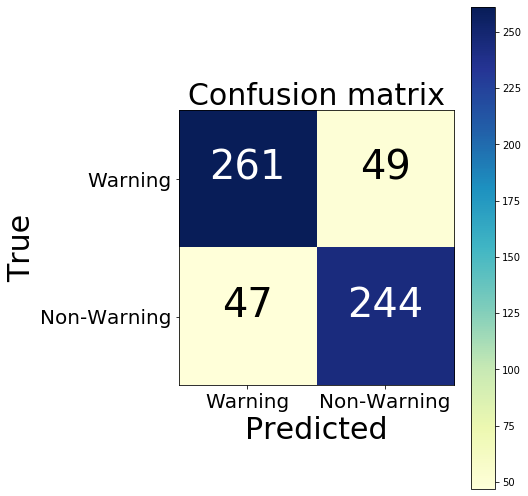

[[261  49]
 [ 47 244]]


In [202]:
cm = confusion_matrix(y_test_class, y_preds_tvec)
fig = plt.figure(figsize=(7, 7))
plot = plot_confusion_matrix(cm, classes=['Warning','Non-Warning'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

[[261  49]
 [ 47 244]]


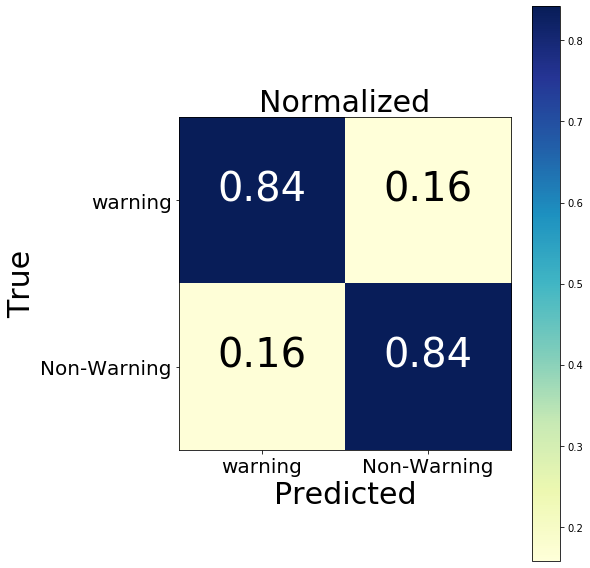

In [203]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_class, y_preds_tvec)
np.set_printoptions(precision=2)
print(cnf_matrix)

# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=['warning','Non-Warning'], normalize=True,
                      title='Normalized')

plt.show()

In [205]:
# Let's create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in rf_tvec_class.predict_proba(X_test_tvec_class)]

pred_df = pd.DataFrame({'true_values': y_test_class,
                        'pred_probs':pred_proba})
pred_df

,true_values,pred_probs
1456,1,0.510000
1824,0,0.090000
2043,1,0.622972
836,0,0.713626
1081,1,0.720000
...,...,...
667,1,0.512368
2048,0,0.060000
578,1,0.982063
906,0,0.020000


#### Receiver Operating Characteristic (ROC) Curve

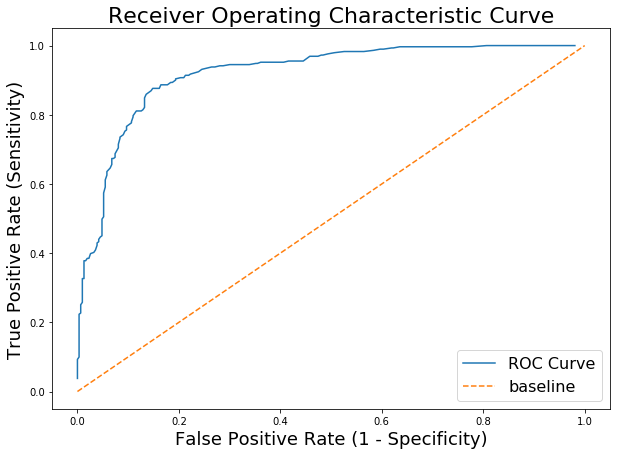

In [206]:
import matplotlib.pyplot as plt

# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=18)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

ROC Curve shows the tradeoff between sensitivity and specificity of our model which in this case loosely means that how good the model can distinguish.

The AUC (the area under the ROC curve) seems to be large enough therefore this show that our model is doing a good job of distinguishing the positive and the negative values.

Since our model is performing well enough, we are well convinced to move forth with it.

In [208]:
#get the feature name 
columns=(tvec_class.get_feature_names())
columns_1 = rf_tvec_class.feature_importances_

In [211]:
coef = pd.DataFrame(list(zip(columns,columns_1.tolist())))
coef

,0,1
0,aaa,3.684000e-07
1,aan,0.000000e+00
2,aanbieding,5.124418e-09
3,aankoopbedrag,4.563733e-08
4,aanleg,7.756467e-05
...,...,...
4003,zolang,7.900356e-05
4004,zone,1.115743e-05
4005,zu,1.738957e-07
4006,zuletzt,1.446518e-06


In [212]:
important_features = coef.sort_values(by = 1, ascending=False) 
important_features.head(10)

,0,1
776,cooky,0.019949
3260,service,0.014717
1757,including,0.012016
2895,reason,0.009819
35,account,0.008993
3787,use,0.008836
3622,time,0.008488
2562,party,0.008404
3774,updated,0.008067
1244,error,0.007773


In [225]:
important_features_2 = important_features.loc[important_features[1] != 0]

In [230]:
important_features_2 = important_features_2.sort_values(by = 1, ascending=False)
important_features_2.tail(10)

,0,1
2,aanbieding,5.124418e-09
2371,nk,4.928164e-09
127,afnemer,4.856796e-09
858,dat,4.302039e-09
18,acc,4.297628e-09
3515,surveillance,3.873693e-09
3085,respecter,3.392265e-09
4002,zo,2.120149e-09
2473,openwrt,2.038205e-09
309,au,1.883151e-09


In [500]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

In [512]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Warning', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Non-Warning', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

In [513]:
Y_pp = pd.DataFrame(rf_tvec_class.predict_proba(X_test_tvec_class), columns=['warning','non-warning'])
Y_pp.head(10)

,warning,non-warning
0,0.390000,0.610000
1,0.910000,0.090000
2,0.291052,0.708948
3,0.251896,0.748104
4,0.310000,0.690000
5,0.690000,0.310000
6,0.191589,0.808411
7,0.930000,0.070000
8,0.980000,0.020000
9,0.270000,0.730000


In [514]:
sgdc_binary = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)
sgdc_binary.fit(X_train_tvec_class, y_train_class)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [525]:
importance_tfidf = get_most_important_features(tvec_class, sgdc_binary, 15)
importance_tfidf

{0: {'tops': [(2.665996155490082, 'robot'),
   (2.6693566174237504, 'non'),
   (2.714101154582343, 'copyright'),
   (2.829136005963485, 'notification'),
   (2.832177370561375, 'day'),
   (2.833970582916807, 'email'),
   (2.9079165018097077, 'illegal'),
   (2.944690372001749, 'updated'),
   (3.161009639975983, 'old'),
   (3.206276953338624, 'tracking'),
   (3.6224006141672267, 'aggregate'),
   (3.6370323826651743, 'ownership'),
   (3.675700505420271, 'refund'),
   (3.7610564934159587, 'notify'),
   (3.82074251307233, 'age')],
  'bottom': [(-2.895565514615513, 'location'),
   (-2.912060150787442, 'loss'),
   (-3.1210172930593125, 'reserve'),
   (-3.132725844568201, 'time'),
   (-3.1575308440897296, 'track'),
   (-3.2602232716600636, 'modify'),
   (-3.2766780462599447, 'terminate'),
   (-3.2767552289767705, 'claim'),
   (-3.3275609623329077, 'pixel'),
   (-3.4556074133455605, 'risk'),
   (-3.529644413598909, 'error'),
   (-3.6219701450363706, 'arbitration'),
   (-3.7690788261504986, 'warr

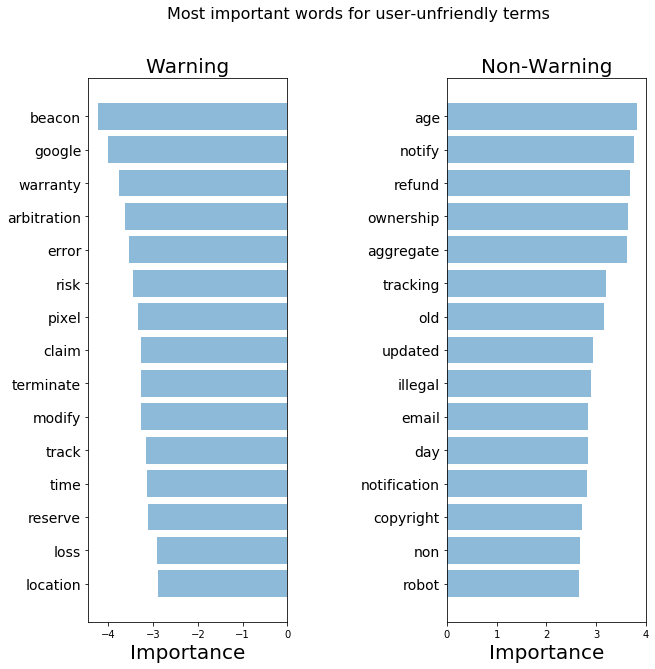

In [526]:
top_scores = [a[0] for a in importance_tfidf[0]['tops']]
top_words = [a[1] for a in importance_tfidf[0]['tops']]
bottom_scores = [a[0] for a in importance_tfidf[0]['bottom']]
bottom_words = [a[1] for a in importance_tfidf[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for user-unfriendly terms")

## Terms of Service Classifier

In [447]:
import requests
from readability import Document

In [448]:
url = 'https://www.whatsapp.com/legal?doc=terms-of-service&version=20120707'

In [449]:
response = requests.get(url)
doc = Document(response.text)

In [450]:
doc.title()

'WhatsApp Legal Info'

In [451]:
doc.summary(html_partial=True)

'<div><div class="_-pk rich-text"><h3>1. Your Acceptance</h3>\n<p>This is an agreement between WhatsApp Inc., a California corporation ("WhatsApp"), the owner and operator of <a href="http://www.whatsapp.com/" data-lnfb-mode="ie">www.whatsapp.com</a> (the "WhatsApp Site"), the WhatsApp software, including WhatsApp Messenger (collectively, including all content provided by WhatsApp through WhatsApp Messenger and the WhatsApp Site, the "WhatsApp Service", or the "Service"), and you ("you" or "You"), a user of the Service. BY USING THE SERVICE, YOU ACKNOWLEDGE AND AGREE TO THESE TERMS OF SERVICE, AND WHATSAPP\'S PRIVACY POLICY, WHICH CAN BE FOUND AT <a class="_36or" href="http://www.whatsapp.com/legal/#Privacy" data-lnfb-mode="ie"/><a href="http://www.whatsapp.com/legal/#Privacy" data-lnfb-mode="ie">http://www.whatsapp.com/legal/#Privacy</a>, AND WHICH ARE INCORPORATED HEREIN BY REFERENCE. If you choose to not agree with any of these terms, you may not use the Service.</p>\n<h3>2. WhatsAp

In [452]:
full_text = doc.summary(html_partial=True)

In [453]:
full_text

'<div><div class="_-pk rich-text"><h3>1. Your Acceptance</h3>\n<p>This is an agreement between WhatsApp Inc., a California corporation ("WhatsApp"), the owner and operator of <a href="http://www.whatsapp.com/" data-lnfb-mode="ie">www.whatsapp.com</a> (the "WhatsApp Site"), the WhatsApp software, including WhatsApp Messenger (collectively, including all content provided by WhatsApp through WhatsApp Messenger and the WhatsApp Site, the "WhatsApp Service", or the "Service"), and you ("you" or "You"), a user of the Service. BY USING THE SERVICE, YOU ACKNOWLEDGE AND AGREE TO THESE TERMS OF SERVICE, AND WHATSAPP\'S PRIVACY POLICY, WHICH CAN BE FOUND AT <a class="_36or" href="http://www.whatsapp.com/legal/#Privacy" data-lnfb-mode="ie"/><a href="http://www.whatsapp.com/legal/#Privacy" data-lnfb-mode="ie">http://www.whatsapp.com/legal/#Privacy</a>, AND WHICH ARE INCORPORATED HEREIN BY REFERENCE. If you choose to not agree with any of these terms, you may not use the Service.</p>\n<h3>2. WhatsAp

In [454]:
full_text.rstrip()

'<div><div class="_-pk rich-text"><h3>1. Your Acceptance</h3>\n<p>This is an agreement between WhatsApp Inc., a California corporation ("WhatsApp"), the owner and operator of <a href="http://www.whatsapp.com/" data-lnfb-mode="ie">www.whatsapp.com</a> (the "WhatsApp Site"), the WhatsApp software, including WhatsApp Messenger (collectively, including all content provided by WhatsApp through WhatsApp Messenger and the WhatsApp Site, the "WhatsApp Service", or the "Service"), and you ("you" or "You"), a user of the Service. BY USING THE SERVICE, YOU ACKNOWLEDGE AND AGREE TO THESE TERMS OF SERVICE, AND WHATSAPP\'S PRIVACY POLICY, WHICH CAN BE FOUND AT <a class="_36or" href="http://www.whatsapp.com/legal/#Privacy" data-lnfb-mode="ie"/><a href="http://www.whatsapp.com/legal/#Privacy" data-lnfb-mode="ie">http://www.whatsapp.com/legal/#Privacy</a>, AND WHICH ARE INCORPORATED HEREIN BY REFERENCE. If you choose to not agree with any of these terms, you may not use the Service.</p>\n<h3>2. WhatsAp

In [455]:
from unicodedata import normalize    
full_text = full_text.replace(r"\n", " ")
full_text = full_text.replace(r"</h3>\n<p>", " ")
full_text = full_text.replace(r" \n<h3>", " ")
full_text = full_text.replace(r"\t", " ")
full_text = full_text.replace(r"/", " ")
full_text = full_text.replace(r"<p>", " ")
full_text = full_text.replace(r"< p>", " ")

In [456]:
full_text

'<div><div class="_-pk rich-text"><h3>1. Your Acceptance< h3>\n This is an agreement between WhatsApp Inc., a California corporation ("WhatsApp"), the owner and operator of <a href="http:  www.whatsapp.com " data-lnfb-mode="ie">www.whatsapp.com< a> (the "WhatsApp Site"), the WhatsApp software, including WhatsApp Messenger (collectively, including all content provided by WhatsApp through WhatsApp Messenger and the WhatsApp Site, the "WhatsApp Service", or the "Service"), and you ("you" or "You"), a user of the Service. BY USING THE SERVICE, YOU ACKNOWLEDGE AND AGREE TO THESE TERMS OF SERVICE, AND WHATSAPP\'S PRIVACY POLICY, WHICH CAN BE FOUND AT <a class="_36or" href="http:  www.whatsapp.com legal #Privacy" data-lnfb-mode="ie" ><a href="http:  www.whatsapp.com legal #Privacy" data-lnfb-mode="ie">http:  www.whatsapp.com legal #Privacy< a>, AND WHICH ARE INCORPORATED HEREIN BY REFERENCE. If you choose to not agree with any of these terms, you may not use the Service. \n<h3>2. WhatsApp Ser

In [457]:
full_text = normalize('NFKD', full_text)

In [458]:
full_text = full_text.split('< p>')

In [459]:
full_text

['<div><div class="_-pk rich-text"><h3>1. Your Acceptance< h3>\n This is an agreement between WhatsApp Inc., a California corporation ("WhatsApp"), the owner and operator of <a href="http:  www.whatsapp.com " data-lnfb-mode="ie">www.whatsapp.com< a> (the "WhatsApp Site"), the WhatsApp software, including WhatsApp Messenger (collectively, including all content provided by WhatsApp through WhatsApp Messenger and the WhatsApp Site, the "WhatsApp Service", or the "Service"), and you ("you" or "You"), a user of the Service. BY USING THE SERVICE, YOU ACKNOWLEDGE AND AGREE TO THESE TERMS OF SERVICE, AND WHATSAPP\'S PRIVACY POLICY, WHICH CAN BE FOUND AT <a class="_36or" href="http:  www.whatsapp.com legal #Privacy" data-lnfb-mode="ie" ><a href="http:  www.whatsapp.com legal #Privacy" data-lnfb-mode="ie">http:  www.whatsapp.com legal #Privacy< a>, AND WHICH ARE INCORPORATED HEREIN BY REFERENCE. If you choose to not agree with any of these terms, you may not use the Service. \n<h3>2. WhatsApp Se

In [460]:
import re

TAG_RE = re.compile(r'<[^>][^>]+>')
def remove_tags(text):
    return TAG_RE.sub(' ', text)

In [461]:
term_text = list(map(remove_tags, full_text))

In [462]:
term_text

['   1. Your Acceptance \n This is an agreement between WhatsApp Inc., a California corporation ("WhatsApp"), the owner and operator of  www.whatsapp.com  (the "WhatsApp Site"), the WhatsApp software, including WhatsApp Messenger (collectively, including all content provided by WhatsApp through WhatsApp Messenger and the WhatsApp Site, the "WhatsApp Service", or the "Service"), and you ("you" or "You"), a user of the Service. BY USING THE SERVICE, YOU ACKNOWLEDGE AND AGREE TO THESE TERMS OF SERVICE, AND WHATSAPP\'S PRIVACY POLICY, WHICH CAN BE FOUND AT   http:  www.whatsapp.com legal #Privacy , AND WHICH ARE INCORPORATED HEREIN BY REFERENCE. If you choose to not agree with any of these terms, you may not use the Service. \n 2. WhatsApp Service \n These Terms of Service apply to all users of the WhatsApp Service. Information provided by our users through the WhatsApp Service may contain links to third party websites that are not owned or controlled by WhatsApp. WhatsApp has no control o

In [463]:
term_frame = pd.DataFrame(np.array(term_text), columns = ['quoteText'])

In [465]:
term_frame

,quoteText
0,1. Your Acceptance \n This is an agreement ...


In [466]:
term_frame.quoteText[0]

'   1. Your Acceptance \n This is an agreement between WhatsApp Inc., a California corporation ("WhatsApp"), the owner and operator of  www.whatsapp.com  (the "WhatsApp Site"), the WhatsApp software, including WhatsApp Messenger (collectively, including all content provided by WhatsApp through WhatsApp Messenger and the WhatsApp Site, the "WhatsApp Service", or the "Service"), and you ("you" or "You"), a user of the Service. BY USING THE SERVICE, YOU ACKNOWLEDGE AND AGREE TO THESE TERMS OF SERVICE, AND WHATSAPP\'S PRIVACY POLICY, WHICH CAN BE FOUND AT   http:  www.whatsapp.com legal #Privacy , AND WHICH ARE INCORPORATED HEREIN BY REFERENCE. If you choose to not agree with any of these terms, you may not use the Service. \n 2. WhatsApp Service \n These Terms of Service apply to all users of the WhatsApp Service. Information provided by our users through the WhatsApp Service may contain links to third party websites that are not owned or controlled by WhatsApp. WhatsApp has no control ov

In [467]:
term_frame.quoteText[0]

'   1. Your Acceptance \n This is an agreement between WhatsApp Inc., a California corporation ("WhatsApp"), the owner and operator of  www.whatsapp.com  (the "WhatsApp Site"), the WhatsApp software, including WhatsApp Messenger (collectively, including all content provided by WhatsApp through WhatsApp Messenger and the WhatsApp Site, the "WhatsApp Service", or the "Service"), and you ("you" or "You"), a user of the Service. BY USING THE SERVICE, YOU ACKNOWLEDGE AND AGREE TO THESE TERMS OF SERVICE, AND WHATSAPP\'S PRIVACY POLICY, WHICH CAN BE FOUND AT   http:  www.whatsapp.com legal #Privacy , AND WHICH ARE INCORPORATED HEREIN BY REFERENCE. If you choose to not agree with any of these terms, you may not use the Service. \n 2. WhatsApp Service \n These Terms of Service apply to all users of the WhatsApp Service. Information provided by our users through the WhatsApp Service may contain links to third party websites that are not owned or controlled by WhatsApp. WhatsApp has no control ov

In [469]:
term_frame

,quoteText
0,1. Your Acceptance \n This is an agreement ...


In [470]:
# created a tokens column for future use
tokenizer = RegexpTokenizer(r'\w+')
term_frame['tokenized'] = term_frame['quoteText'].apply(tokenizer.tokenize)

In [471]:
def text_to_words(titletext):
    
    # 1. keep only alphabets.
    letters_only = re.sub("[^a-zA-Z]", " ", titletext)
    
    # 2. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 5. lemmatizer the words.
    lemmatizer = WordNetLemmatizer()
    tokens_lem = [lemmatizer.lemmatize(i) for i in words]
    
    # 6. Join the words back into one string separated by space, and return the result.
    return(' '.join(tokens_lem))

In [472]:
#call the function to clean df['quoteText']
lemmatized=[]

for text in term_frame['quoteText']:
     # Convert text to words, then append to clean_text.
    lemmatized.append(text_to_words(text))

In [473]:
lemmatized

['your acceptance this is an agreement between whatsapp inc a california corporation whatsapp the owner and operator of www whatsapp com the whatsapp site the whatsapp software including whatsapp messenger collectively including all content provided by whatsapp through whatsapp messenger and the whatsapp site the whatsapp service or the service and you you or you a user of the service by using the service you acknowledge and agree to these term of service and whatsapp s privacy policy which can be found at http www whatsapp com legal privacy and which are incorporated herein by reference if you choose to not agree with any of these term you may not use the service whatsapp service these term of service apply to all user of the whatsapp service information provided by our user through the whatsapp service may contain link to third party website that are not owned or controlled by whatsapp whatsapp ha no control over and assumes no responsibility for the content privacy policy or practic

In [474]:
term_frame['lemmatized'] = lemmatized

In [475]:
term_frame

,quoteText,tokenized,lemmatized
0,1. Your Acceptance \n This is an agreement ...,"[1, Your, Acceptance, This, is, an, agreement,...",your acceptance this is an agreement between w...


In [476]:
term_frame[['quoteText','lemmatized']].head(10)

,quoteText,lemmatized
0,1. Your Acceptance \n This is an agreement ...,your acceptance this is an agreement between w...


In [477]:
term_frame.shape

(1, 3)

In [478]:
len(X_train)

1802

In [479]:
tvec = TfidfVectorizer(stop_words='english')
tvec.fit(X_train)
X_train_tvec = tvec.transform(X_train)
X_tos_tvec = tvec.transform(term_frame['lemmatized'])

In [480]:
lr_tvec = LogisticRegression(C=100.0, class_weight='balanced', solver='newton-cg', multi_class='multinomial',
                          random_state=7)
lr_tvec.fit(X_train_tvec, y_train)

LogisticRegression(C=100.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=7, solver='newton-cg', tol=0.0001,
                   verbose=0, warm_start=False)

In [481]:
tos_preds = lr_tvec.predict(X_tos_tvec)

In [482]:
tos_preds

array(['Governance'], dtype=object)

In [483]:
tos_topic = pd.DataFrame(tos_preds, columns =['pred_topic'])

In [484]:
tos_topic

,pred_topic
0,Governance


### Class prediction

In [485]:
X_tos_tvec_class = tvec_class.transform(term_frame['lemmatized'])

In [486]:
rf_tvec_class = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=1000, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [487]:
rf_tvec_class.fit(X_train_tvec_class, y_train_class)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=1000, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [488]:
tos_class = pd.DataFrame(rf_tvec_class.predict_proba(X_tos_tvec_class), columns=['warning','non-warning'])
tos_class.head(10)

,warning,non-warning
0,0.72,0.28


In [489]:
rf_tvec_class.predict_proba(X_tos_tvec_class)[0]

array([0.72, 0.28])

In [490]:
X_tos_tvec_class

<1x4008 sparse matrix of type '<class 'numpy.float64'>'
	with 587 stored elements in Compressed Sparse Row format>

In [491]:
tos_class.shape

(1, 2)

In [492]:
results = pd.merge(term_frame, tos_topic, left_index=True, right_index=True)
results = pd.merge(results, tos_class, left_index=True, right_index=True)

In [493]:
results

,quoteText,tokenized,lemmatized,pred_topic,warning,non-warning
0,1. Your Acceptance \n This is an agreement ...,"[1, Your, Acceptance, This, is, an, agreement,...",your acceptance this is an agreement between w...,Governance,0.72,0.28


In [494]:
results = results.sort_values('non-warning').head(10)
results

,quoteText,tokenized,lemmatized,pred_topic,warning,non-warning
0,1. Your Acceptance \n This is an agreement ...,"[1, Your, Acceptance, This, is, an, agreement,...",your acceptance this is an agreement between w...,Governance,0.72,0.28


In [495]:
# checking predicted topics
results[results['pred_topic'] == 'Personal Data']

,quoteText,tokenized,lemmatized,pred_topic,warning,non-warning


In [496]:
results['quoteText']

0       1. Your Acceptance \n This is an agreement ...
Name: quoteText, dtype: object

In [497]:
topics = []
for i in results['pred_topic']:
    if i not in topics:
        topics.append(i)

In [498]:
topics

['Governance']

In [499]:
for i in topics:
    topic = results[results['pred_topic'] == i]
    print(i)
    count = 0
    for j in topic.index:
        count +=1
        print()
        print(count,'. ', topic.quoteText[j])
        print()
    print('---')

Governance

1 .     1. Your Acceptance 
 This is an agreement between WhatsApp Inc., a California corporation ("WhatsApp"), the owner and operator of  www.whatsapp.com  (the "WhatsApp Site"), the WhatsApp software, including WhatsApp Messenger (collectively, including all content provided by WhatsApp through WhatsApp Messenger and the WhatsApp Site, the "WhatsApp Service", or the "Service"), and you ("you" or "You"), a user of the Service. BY USING THE SERVICE, YOU ACKNOWLEDGE AND AGREE TO THESE TERMS OF SERVICE, AND WHATSAPP'S PRIVACY POLICY, WHICH CAN BE FOUND AT   http:  www.whatsapp.com legal #Privacy , AND WHICH ARE INCORPORATED HEREIN BY REFERENCE. If you choose to not agree with any of these terms, you may not use the Service. 
 2. WhatsApp Service 
 These Terms of Service apply to all users of the WhatsApp Service. Information provided by our users through the WhatsApp Service may contain links to third party websites that are not owned or controlled by WhatsApp. WhatsApp has n